<a href="https://colab.research.google.com/github/luke2134/Assignment1/blob/main/PCA_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1: MNIST Dataset and PCA**

1. Retrieve and Load the MNIST Dataset

In [17]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file using the correct path
file_path = 'mnist_784.arff'
data, meta = arff.loadarff(file_path)

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Convert the 'class' column from byte strings to regular integers
df['class'] = df['class'].apply(lambda x: int(x.decode('utf-8')))

# Separate the features (X) and labels (y)
X = df.drop('class', axis=1)
y = df['class']

# ormalize the pixel values to be between 0 and 1
X = X / 255.0

print("Data loaded successfully with shape:", X.shape)


Data loaded successfully with shape: (70000, 784)


 2. Display Each Digit

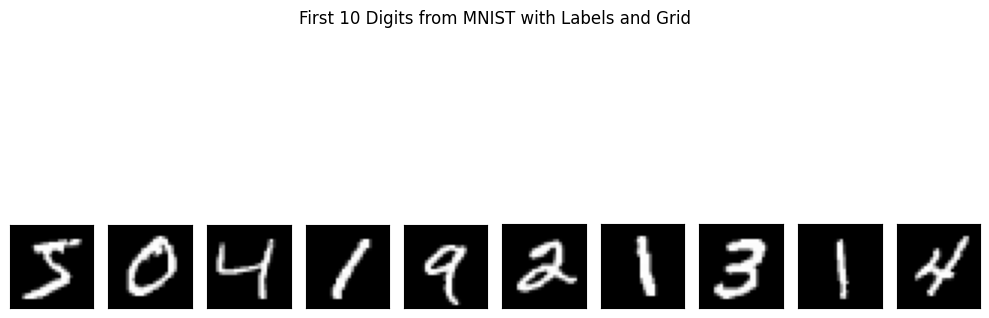

In [37]:
import matplotlib.pyplot as plt

# Function to plot a digit with labels and grid
def plot_digit(data):
    image = data.values.reshape(28, 28)  # Reshape the flat array back to 28x28
    plt.imshow(image, cmap='gray')
    plt.axis("on")  # Turn on axis
    plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)  # Add grid lines
    plt.xticks([])
    plt.yticks([])

# Display the first 10 digits with the improved function
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plot_digit(X.iloc[i])
plt.suptitle("First 10 Digits from MNIST with Labels and Grid")
plt.tight_layout()
plt.show()


3. Use PCA to Retrieve the Principal Components

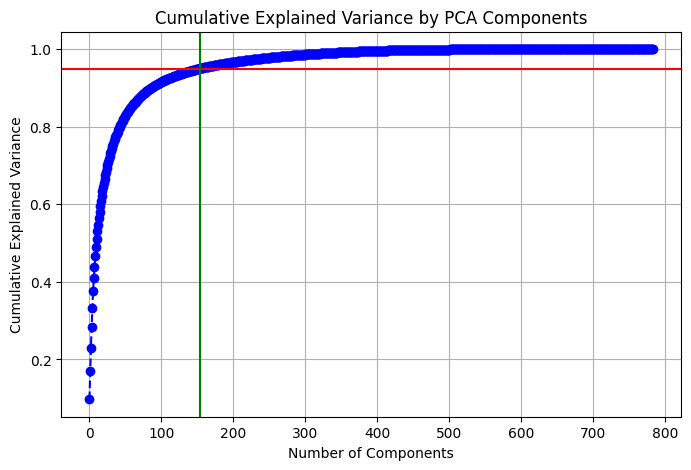

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA with all components
pca_full = PCA().fit(X)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_explained_variance >= 0.95), color='g', linestyle='-')
plt.show()


4.1 Plot the Projections onto a 1D Hyperplane

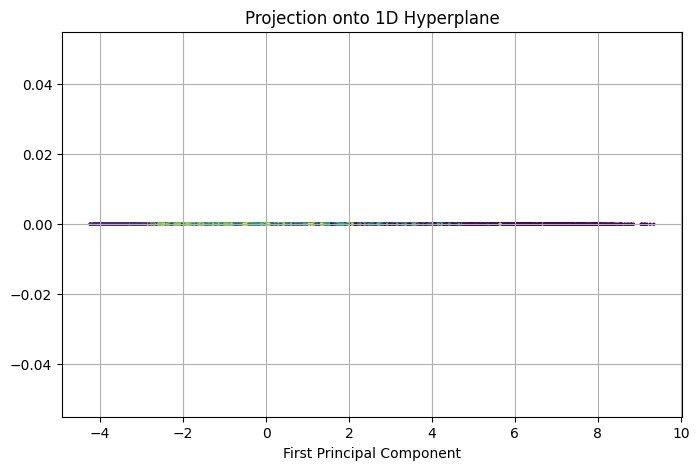

In [35]:
# 1D Visualization using the first two principal component
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=y, cmap='viridis', s=2)
plt.xlabel("First Principal Component")
plt.title("Projection onto 1D Hyperplane")
plt.grid()
plt.show()


4.2 2D Projection Using Two Principal Components

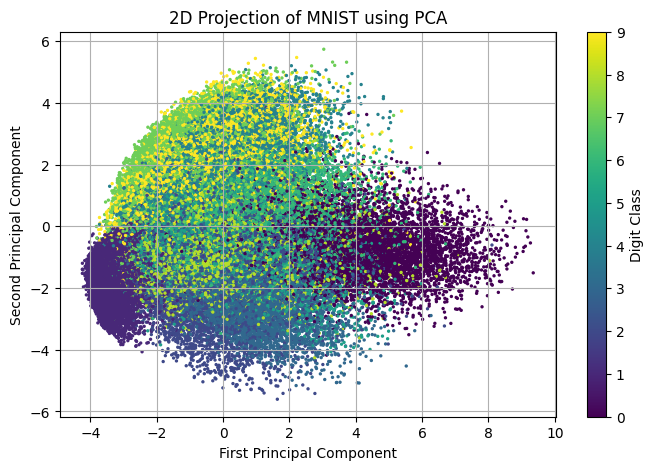

In [36]:
# 2D Visualization using the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=2)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D Projection of MNIST using PCA")
plt.colorbar(label='Digit Class')
plt.grid()
plt.show()


5. Use Incremental PCA to Reduce Dimensionality to 154

In [21]:
from sklearn.decomposition import IncrementalPCA

# Reduce dimensionality using Incremental PCA
ipca = IncrementalPCA(n_components=154, batch_size=200)
X_ipca = ipca.fit_transform(X)

print(f"Shape of data after Incremental PCA: {X_ipca.shape}")


Shape of data after Incremental PCA: (70000, 154)


6. Display the Original and Compressed Digits

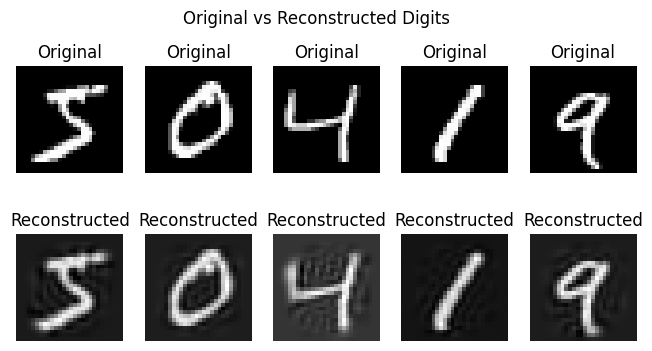

In [22]:
# Reconstruct data from the reduced dimensions
X_reconstructed = ipca.inverse_transform(X_ipca)

# Display the original and compressed digits
plt.figure(figsize=(8, 4))
for i in range(5):
    # Original
    plt.subplot(2, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Compressed and reconstructed
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.suptitle("Original vs Reconstructed Digits")
plt.show()


# **Question 2: Swiss Roll Dataset and Kernel PCA**


1. Generate Swiss Roll Dataset

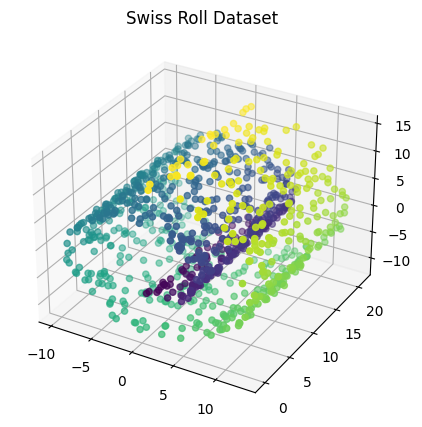

In [23]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# Generate Swiss Roll dataset
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2)

# Plot the resulting Swiss Roll
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap='viridis')
ax.set_title("Swiss Roll Dataset")
plt.show()


2. Use Kernel PCA with Different Kernels

Applying Kernel PCA with linear kernel and gamma=0.01


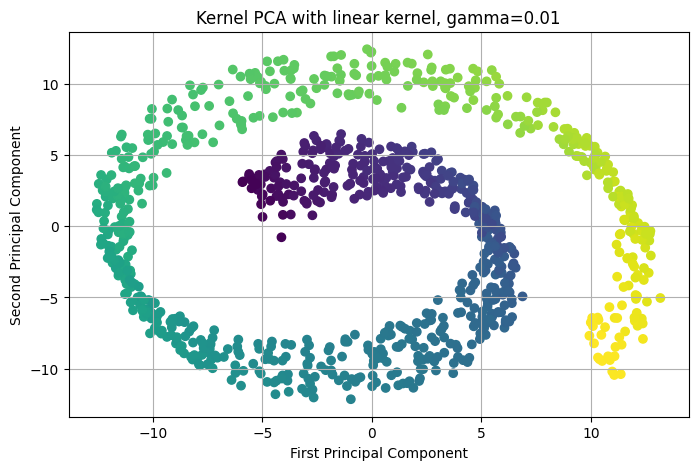

Applying Kernel PCA with linear kernel and gamma=0.001


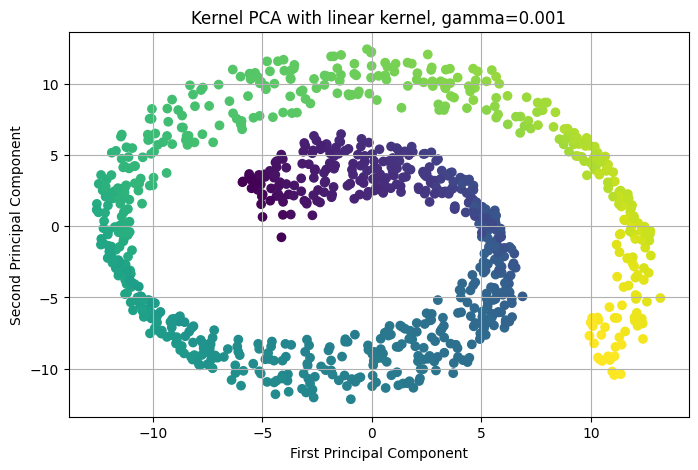

Applying Kernel PCA with linear kernel and gamma=0.0001


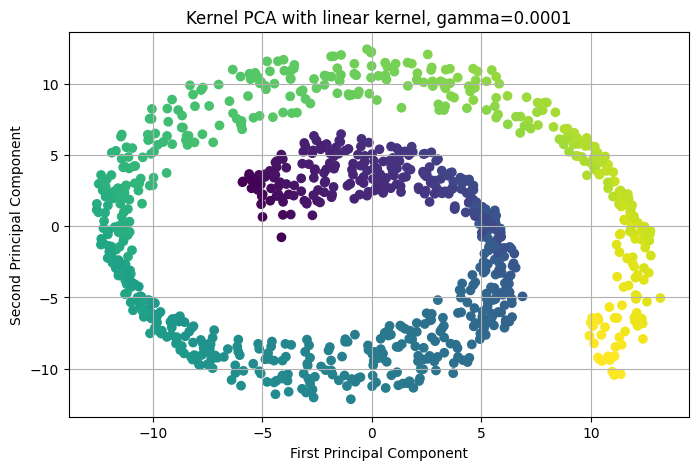

Applying Kernel PCA with rbf kernel and gamma=0.01


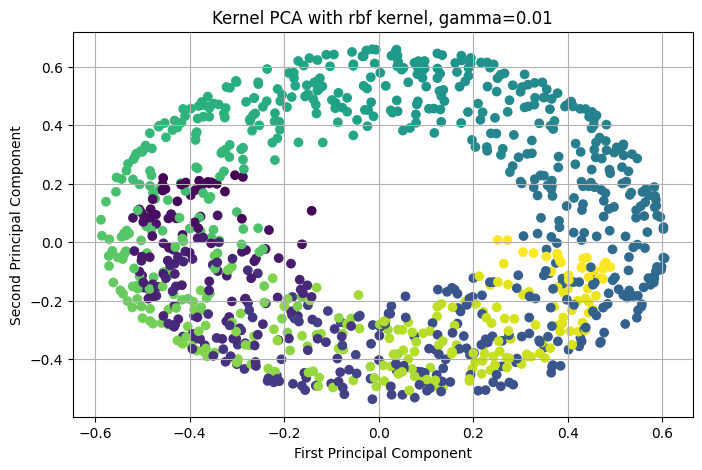

Applying Kernel PCA with rbf kernel and gamma=0.001


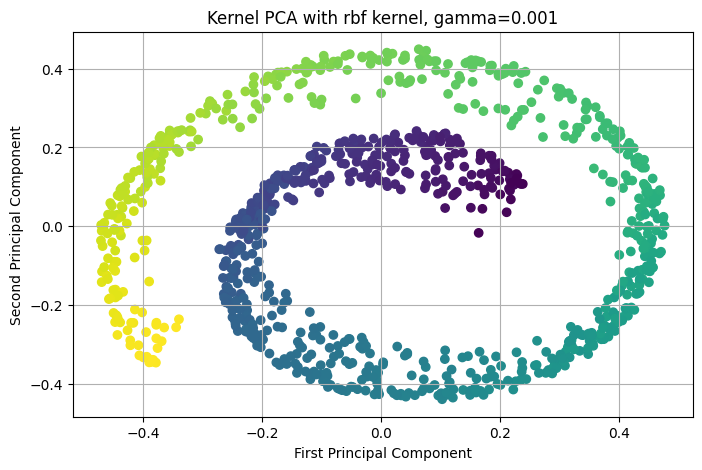

Applying Kernel PCA with rbf kernel and gamma=0.0001


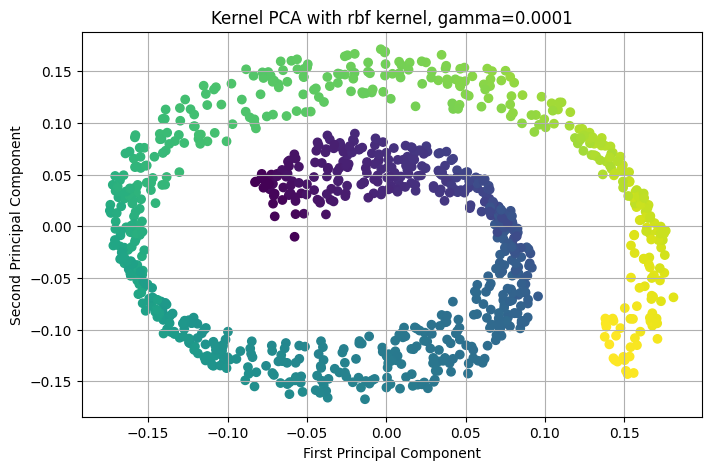

Applying Kernel PCA with sigmoid kernel and gamma=0.01
Failed with kernel sigmoid and gamma 0.01: There are significant negative eigenvalues (0.353523 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.
Applying Kernel PCA with sigmoid kernel and gamma=0.001
Failed with kernel sigmoid and gamma 0.001: There are significant negative eigenvalues (0.0591342 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.
Applying Kernel PCA with sigmoid kernel and gamma=0.0001
Failed with kernel sigmoid and gamma 0.0001: There are significant negative eigenvalues (0.0055783 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.


In [26]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np

# Define the kernels and parameters to test
kernels = ['linear', 'rbf', 'sigmoid']
gamma_values = [0.01, 0.001, 0.0001]  # Use smaller gamma values to improve stability

# Apply Kernel PCA with different kernels and plot the results
for kernel in kernels:
    for gamma in gamma_values:
        try:
            print(f"Applying Kernel PCA with {kernel} kernel and gamma={gamma}")

            # Perform Kernel PCA with regularization
            kpca = KernelPCA(kernel=kernel, fit_inverse_transform=True, gamma=gamma, alpha=1e-3, remove_zero_eig=True)
            X_kpca = kpca.fit_transform(X_swiss)

            # Plot the results of kPCA
            plt.figure(figsize=(8, 5))
            plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=t, cmap='viridis')
            plt.title(f"Kernel PCA with {kernel} kernel, gamma={gamma}")
            plt.xlabel("First Principal Component")
            plt.ylabel("Second Principal Component")
            plt.grid()
            plt.show()

        except ValueError as e:
            print(f"Failed with kernel {kernel} and gamma {gamma}: {e}")



3. Compare and Explain Results

*   **Linear Kernel:** Best for linearly separable data but not effective for non-linear datasets.
*   **RBF Kernel:** Most effective for non-linear data like the Swiss roll; it successfully disentangles and separates the data.


*   **Sigmoid Kernel:** Sensitive and prone to instability, making it challenging to use without careful parameter optimization.






4. kPCA and Logistic Regression with GridSearchCV

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a pipeline with kPCA and Logistic Regression
kpca = KernelPCA(fit_inverse_transform=True, remove_zero_eig=True)
logistic = LogisticRegression(solver='liblinear')  # Use a simple solver for small datasets
pipeline = Pipeline([("kpca", kpca), ("logistic", logistic)])

# Create a binary classification target
# Classifying based on whether t is greater than 6 for more balanced classes
y_classification = (t > 6).astype(int)

# Grid search for best kernel, gamma, and logistic regression parameters
param_grid = {
    "kpca__kernel": ["linear", "rbf"],
    "kpca__gamma": np.logspace(-2, 2, 5),
    "logistic__C": np.logspace(-3, 3, 5)
}

# Create and fit GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_swiss, y_classification)  # Using the binary classification target

# Output the best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_swiss)

# Classification report for the best model
print("Classification Report for the Best Model:\n", classification_report(y_classification, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by GridSearchCV: {'kpca__gamma': 0.01, 'kpca__kernel': 'rbf', 'logistic__C': 1000.0}
Best cross-validation accuracy: 0.9970000000000001
Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      1.00      1.00       870

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



5. Plot GridSearchCV Results

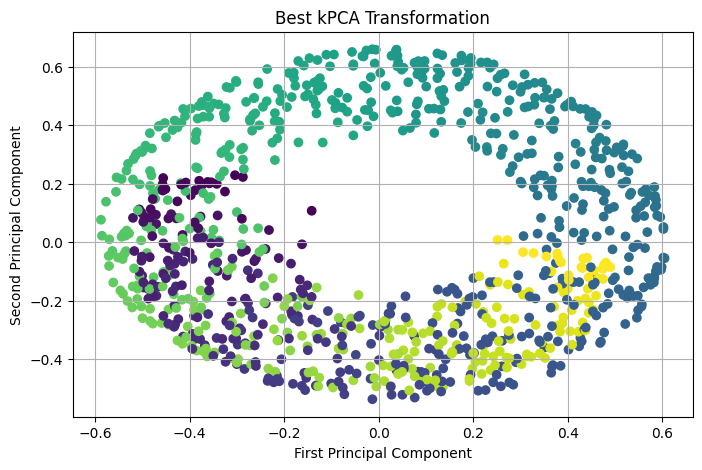


Best kPCA Transformation Explanation:

1. The best kernel identified by GridSearchCV is the RBF (Radial Basis Function) kernel with gamma = 0.01.
2. The RBF kernel effectively unravels the complex non-linear structure of the Swiss roll dataset, transforming it into a space where the data points are more linearly separable.
3. The visualization shows distinct clusters in the transformed space, indicating that the kPCA transformation has captured the underlying structure of the data well.
4. This optimal transformation allows the logistic regression classifier to achieve a high classification accuracy, as evidenced by the classification report.
5. Overall, the selected RBF kernel with the chosen parameters provides the best separation and classification results for this dataset.



In [41]:
# Extract and plot the results of the best model
best_kpca = grid_search.best_estimator_.named_steps['kpca']
X_best_kpca = best_kpca.transform(X_swiss)

plt.figure(figsize=(8, 5))
plt.scatter(X_best_kpca[:, 0], X_best_kpca[:, 1], c=t, cmap='viridis')
plt.title("Best kPCA Transformation")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid()
plt.show()


# Explanation of the Best kPCA Transformation
print("""
Best kPCA Transformation Explanation:

1. The best kernel identified by GridSearchCV is the RBF (Radial Basis Function) kernel with gamma = 0.01.
2. The RBF kernel effectively unravels the complex non-linear structure of the Swiss roll dataset, transforming it into a space where the data points are more linearly separable.
3. The visualization shows distinct clusters in the transformed space, indicating that the kPCA transformation has captured the underlying structure of the data well.
4. This optimal transformation allows the logistic regression classifier to achieve a high classification accuracy, as evidenced by the classification report.
5. Overall, the selected RBF kernel with the chosen parameters provides the best separation and classification results for this dataset.
""")
